In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [2]:
avg_110, t_el, ql_dyn, ql_sta = process_group(group='E0110', 
                                              prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis',
                                              zone_idx=2,
                                              num_cores=24)

2023-11-02 22:38:08,845 utils                   : total number of files in E0110  is 1198
2023-11-02 22:38:10,126 xpcs_viewer.fileIO.hdf_reader: key not found: /exchange/tau
2023-11-02 22:38:10,226 xpcs_viewer.fileIO.hdf_reader: key not found: /exchange/tau
2023-11-02 22:38:11,421 utils                   : label='E0110_section_04': remove 14 datasets out of 118
2023-11-02 22:38:11,426 utils                   : label='E0110_section_00': remove 17 datasets out of 120
2023-11-02 22:38:11,427 utils                   : label='E0110_section_01': remove 13 datasets out of 120
2023-11-02 22:38:11,430 utils                   : label='E0110_section_02': remove 14 datasets out of 120
2023-11-02 22:38:11,434 utils                   : label='E0110_section_03': remove 15 datasets out of 120
2023-11-02 22:38:11,445 utils                   : label='E0110_section_05': remove 16 datasets out of 120
2023-11-02 22:38:11,450 utils                   : label='E0110_section_06': remove 16 datasets out of 120


In [7]:
avg_111, _, _, _ = process_group(group='E0111', 
                                 prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis',
                                 zone_idx=2,
                                 num_cores=24)

2023-11-02 22:38:39,588 utils                   : total number of files in E0111  is 1197
2023-11-02 22:38:42,117 utils                   : label='E0111_section_01': remove 14 datasets out of 120
2023-11-02 22:38:42,119 utils                   : label='E0111_section_00': remove 14 datasets out of 120
2023-11-02 22:38:42,121 utils                   : label='E0111_section_02': remove 15 datasets out of 120
2023-11-02 22:38:42,124 utils                   : label='E0111_section_03': remove 14 datasets out of 120
2023-11-02 22:38:42,127 utils                   : label='E0111_section_04': remove 14 datasets out of 120
2023-11-02 22:38:42,130 utils                   : label='E0111_section_05': remove 16 datasets out of 120
2023-11-02 22:38:42,130 utils                   : label='E0111_section_08': remove 17 datasets out of 119
2023-11-02 22:38:42,128 utils                   : label='E0111_section_07': remove 15 datasets out of 119
2023-11-02 22:38:42,138 utils                   : label='E0111

In [10]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

2023-11-02 22:39:16,472 fontTools.subset        : maxp pruned
2023-11-02 22:39:16,479 fontTools.subset        : cmap pruned
2023-11-02 22:39:16,479 fontTools.subset        : kern dropped
2023-11-02 22:39:16,480 fontTools.subset        : post pruned
2023-11-02 22:39:16,480 fontTools.subset        : FFTM dropped
2023-11-02 22:39:16,482 fontTools.subset        : GPOS pruned
2023-11-02 22:39:16,484 fontTools.subset        : GSUB pruned
2023-11-02 22:39:16,485 fontTools.subset        : name pruned
2023-11-02 22:39:16,489 fontTools.subset        : glyf pruned
2023-11-02 22:39:16,490 fontTools.subset        : Added gid0 to subset
2023-11-02 22:39:16,490 fontTools.subset        : Added first four glyphs to subset
2023-11-02 22:39:16,490 fontTools.subset        : Closing glyph list over 'GSUB': 5 glyphs before
2023-11-02 22:39:16,491 fontTools.subset        : Glyph names: ['.notdef', '.null', 'Aring', 'nonmarkingreturn', 'space']
2023-11-02 22:39:16,491 fontTools.subset        : Glyph IDs:   [0

2023-11-02 22:39:16,587 fontTools.subset        : kern pruned
2023-11-02 22:39:16,587 fontTools.subset        : post pruned
2023-11-02 22:39:16,587 fontTools.subset        : PCLT dropped
2023-11-02 22:39:16,588 fontTools.subset        : GSUB pruned
2023-11-02 22:39:16,588 fontTools.subset        : JSTF dropped
2023-11-02 22:39:16,588 fontTools.subset        : DSIG dropped
2023-11-02 22:39:16,589 fontTools.subset        : name pruned
2023-11-02 22:39:16,591 fontTools.subset        : glyf pruned
2023-11-02 22:39:16,592 fontTools.subset        : Added gid0 to subset
2023-11-02 22:39:16,592 fontTools.subset        : Added first four glyphs to subset
2023-11-02 22:39:16,592 fontTools.subset        : Closing glyph list over 'GSUB': 30 glyphs before
2023-11-02 22:39:16,592 fontTools.subset        : Glyph names: ['.notdef', '.null', 'C', 'I', 'T', 'a', 'c', 'e', 'five', 'four', 'g', 'i', 'm', 'minus', 'nonmarkingreturn', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 's

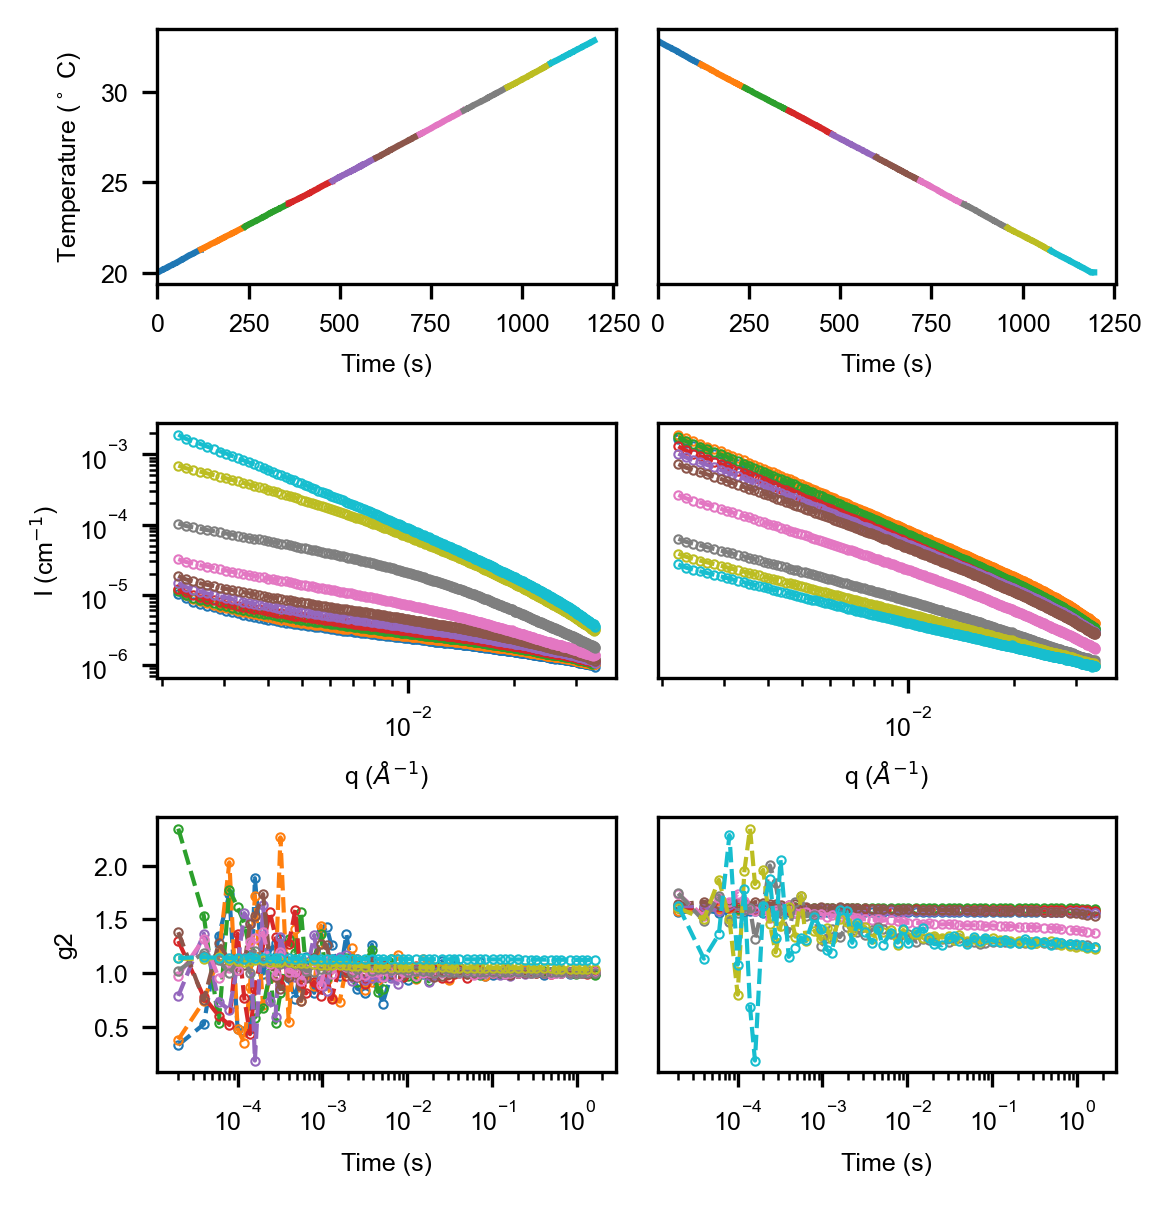

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(3.8, 4))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)

def plot_one_column(ax, avg_data_list, omit_ylabel=False):
    for avg_dict in avg_data_list:
        # x = avg_dict['temperature'] * 4.0  # how to convert index to time (seconds)?
        ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'])
        
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
        
        # x = np.
        ax[2].plot(t_el, avg_dict['g2'][:, 1], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
    
    ax[0].set_xlabel('Time (s)')
    ax[1].set_xlabel('q ($\\AA^{-1}$)')
    ax[2].set_xlabel('Time (s)')
    
    if not omit_ylabel:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_110)
plot_one_column(ax[:, 1], avg_111, omit_ylabel=True)
 

plt.subplots_adjust(wspace=0)
plt.savefig('figure3.png', dpi=300)
plt.savefig('figure3.pdf')
plt.tight_layout()

In [6]:
print(t_el)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.003
 0.003 0.004 0.004 0.005 0.006 0.008 0.009 0.01  0.013 0.015 0.018 0.02
 0.026 0.031 0.036 0.041 0.051 0.061 0.072 0.082 0.102 0.123 0.143 0.164
 0.205 0.246 0.287 0.328 0.41  0.492 0.573 0.655 0.819 0.983 1.147 1.311
 1.638]
